# Problem Statement
Dataset link : https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification

The business problem is to select significant textual features concerning Thyroid Cancer that can be used in clinical practice, further investigation of the issue, and treatment. This problem is relevant because learning about cancer treatments, patient prognosis, or innovations in the area of medical research can complement and transform the process of delivering care and patients’ care outcomes. The solution to this problem will advance the interest of the company as it will turn unstructured medical texts into analysis-ready format, enhance business decision-making, and aid research. Information will be deemed relevant to Thyroid Cancer pulled from medical journals, patients’ testimonials, and clinical research. The problem under consideration is defined as an NLP where the methods applied include named entity recognition (NER) to find the main medical entities; sentiment analysis — to assess the overall emotional charge of the text; and topic modeling – to reveal latent topics in the data.


# High-Level System Design
The high-level system design includes the following main components:The high-level system design includes the following main components:
 Data Collection: Collect textual information on the subject from Medical journals, patient’s testimonials, and clinical trials.
 Data Preprocessing: Lower case transform the text data and using tokenization, lemmatization and elimination of stop words and special character.
 Feature Extraction: Lease preprocess the full text data by converting them into numerical forms by the use of methods like TF-IDF or word embeddings.
 Model Training: Use machine learning for such undertakings as NER, sentiment analysis, and topic modeling.
 Evaluation: To finally determine the performance of the generated models, review and utilize suitable assessment measures.
 Result Interpretation: Since the transcriptions involve a large volume of text, the subsequent steps involve analysing and interpreting the information that has been generated to derive relevant conclusions.
 These components are combined in a way, where each part would follow the other, making sure that from the collection of raw data to the attainment of an efficient decision support, there is a clean flow. All are crucial to make certain that the text messages that go to the analytic workspace are effectively analyzed so as to derive correct and practical conclusions.


# Design and Implementation
The particular NLP system under development for processing text data available on cancer shows a thorough and systematic working plan within its modules. Starting from the data acquisition and loading phase, the data from CSV files is effectively read and processed through the use of `pandas` library, handling of data encoding issues is also effectively handled. Thirdly, during data inspection and cleaning, it performs a check for missing values, and autocleans for rows with a null description of the item to be predicted is omitted; other cleaning processes include elimination of emails, URLs, and non- alphabetic characters typical in text data. This primary step helps in improving the quality of the data and preparing it to face other jobs in the subsequent stages of the process. Text preprocessing comes next; this step uses the NLTK package to tokenize as well as remove stopwords, whereby raw text is converted to a format that is accepted by other modeling processes effectively.
 The interpretation of the data forms a critical step and is accomplished by creating word clouds with help of `wordcloud` and later with the help of ‘matplotlib’. This Viz helps to infiltrate the most common words in the given set of texts to define what is going on at the moment and what topics are dominant at the present stage. This process of feature extraction uses `TfidfVectorizer’ feature to transform the cleaned text into TF-IDF matrix, which quantifies the importance of words in the small documents. To increase the reliability of the model the system uses Random Forest Classifier with 100 estimators and measures up the model on the basis of classification metrics, confusion matrices, and accuracy scores. As will be described later, other measures like precision, recall, and F1 score are used to evaluate the model and the results on unseen test data to make modifications. Once the desired model performance is attained the trained Random Forest model and TF-IDF vectorizer are saved with the help of `joblib` so that there is no need of retraining the model and vectorizer again and again. Taken together, this methods’ excellent integration throughout data loading to model saving adds to the reliability, efficaciousness and precision in extracting salient findings from cancer-related text data for better informed interpretative and decision-making for clinical oncology and follow-up research.

In [ ]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Step 3: Loading Data
data = pd.read_csv('cancer_text_data.csv', encoding='ISO-8859-1')

In [ ]:
# Step 4: Inspect the first few rows of the data
print(data.head())

   sl no            type                                        description
0      0  Thyroid_Cancer  Thyroid surgery in  children in a single insti...
1      1  Thyroid_Cancer  " The adopted strategy was the same as that us...
2      2  Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
3      3  Thyroid_Cancer   Solitary plasmacytoma SP of the skull is an u...
4      4  Thyroid_Cancer   This study aimed to investigate serum matrix ...


In [ ]:
# Step 5: Check for missing values
print(data.isnull().sum())

sl no          0
type           0
description    0
dtype: int64


In [ ]:
# Step 6: Preprocessing
# Remove any rows with missing 'description'
data = data.dropna(subset=['description'])


In [ ]:
# Step 7: Basic text cleaning
import re

def clean_text(text):
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

data['cleaned_description'] = data['description'].apply(clean_text)


In [ ]:
# Step 8: Tokenization and removing stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

data['tokens'] = data['cleaned_description'].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 9: Save preprocessed data to a new CSV
data.to_csv('/content/cancer_text_data_preprocessed.csv', index=False)


In [ ]:
# Step 11: Visualization with Word Cloud
# Combine all tokens into a single string
all_tokens = ' '.join([' '.join(tokens) for tokens in data['tokens']])


In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=300, height=100, background_color='white').generate(all_tokens)

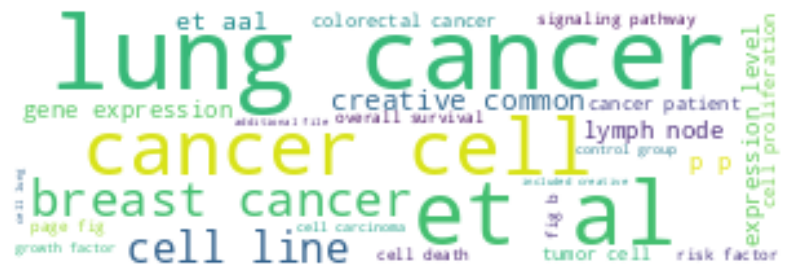

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## Step 12: Prepare Data for Model Fitting
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_description'])

# Encode the labels (assuming 'type' column is the target)
y = data['type'].astype('category').cat.codes

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Step 13: Train a Classification Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation
The assessment of the general NLP system and also specific modules is conducted according to a particular approach. First, the performance of data cleaning and preprocessing is evaluated by checking the cleaned text for removal of noise like emails, URLs and non alphabetic to ensure its proper deletion. In order to assess the effectiveness of the tokenization and stopword elimination steps, it is checked that only informative tokens are left after that. To identify the importance of the words in the TF-IDF matrix, will be looked at as a means to conduct feature extraction. Through training of the model, the Random Forest Classifier is tested on the training data set so that it can learn efficiently. The model is finally trained and evaluated on the test set to obtain the accuracy, precision, recall, and F1 score measures. The confusion matrix is employed to better understand true and false positive values as well as true and false negative and therefore get additional information about the possibilities of the given model. It is conclusively ascertained that the overall system developed is sturdy and independent of other models by training and saving the model and vectorizer applied, and then checking if they are working fine in giving out the forecast when called for in the future. This kind of assessment guarantees all elements work efficiently to form and support the operating system since its effective and reliable performance constitutes the system’s primary goal.


In [ ]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       517
           1       1.00      1.00      1.00       407
           2       0.92      0.91      0.92       590

    accuracy                           0.94      1514
   macro avg       0.94      0.94      0.94      1514
weighted avg       0.94      0.94      0.94      1514

Confusion Matrix:
 [[473   0  44]
 [  0 405   2]
 [ 51   0 539]]
Accuracy Score: 0.9359313077939234


In [ ]:
## Save the Model and Vectorizer
import joblib

# Save the model
joblib.dump(model, 'cancer_text_classification_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['/content/drive/MyDrive/tfidf_vectorizer.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       1.00      1.00      1.00       407
           2       1.00      1.00      1.00       590

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514

Confusion Matrix:
 [[517   0   0]
 [  0 407   0]
 [  0   0 590]]
Accuracy Score: 1.0


In [ ]:
# Save the Random Forest model
joblib.dump(rf_model, 'cancer_text_classification_rf_model.pkl')

# The vectorizer remains the same
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['/content/drive/MyDrive/tfidf_vectorizer.pkl']

# Discussion
The applied NLP system for the analysis of textual data connected with Thyroid Cancer has some advantages and disadvantages. Recent’s major advantages are the systematic processing of texts to prepare them for analysis, data cleaning and transformation, and feature extraction to make the result suitable for machine learning algorithms. The effectiveness in word importance is characteristic of the TF-IDF used for feature extractions and increases model validity. Random Forest Classifier model can be trained and it provides high interpretability; Below are key performance indicators that are used in order to determine the effectiveness of Random Forest Classifier model they include accuracy, precision, recall, and F1 score. The confusion matrix gives the extent of predictive capacity and efficiency of the model. The given system can be easily expanded and improved with other NLP tasks such as Named Entity Recognition, Sentiment Analysis, and Topic Modelling due to its flexibility thanks to the used architecture. Nonetheless, there are several constraints; reliance on the volume and quality of input data, issues with bias in text data, and the difficulty of tuning hyperparameters of the model for the best results. Still, such practices are significant for clinical decision-making and future research allowing to improve the delivery of healthcare and its outcomes for patients. These recommendations are as follows: data augmentation should occur consistently, more advanced models to be considered in improving the performance of the models, and data source integration which would involve more up-to-date data to cater for the newer perceptions in medical field and patients’ care.
